<a href="https://colab.research.google.com/github/spstar18/Ai_project1/blob/main/happiness_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터 가져오기

# 프로젝트 이름
- 학번 : 30410
- 이름 : 김우진

## 1. 주제

카글을 둘러보던 중 흥미로운 데이터를 발견하였다. 바로 국가별 행복 보고서이다. 이 데이터에는 국가별 행복지수가 나와있으며 그 국가의 1인당 gdp, 사회 지원, 부패인식, 건강 수명, 삶의 자유, 관대함 등의 데이터가 나와있다. 

그래서 이 데이터를 사용하여 국가별 행복지수 등을 알아보고 무엇이 행복에 영향을 주었는지 알아보려 한다.

- 질문 

>1. 한국의 행복지수와 그 위치
2. 어느 나라의 행복지수가 높은가
3. 무엇이 행복에 영향을 주는가


## 2. 데이터 수집
- 데이터 수집 방법 : 데이터포털 사이트 검색
- 데이터 수집 사이트 : https://www.kaggle.com/datasets

## 3. 탐색적 데이터 분석 과정

#### 표를 활용하여 분석하기

In [ ]:
import pandas as pd

from google.colab import drive 
drive.mount('/content/drive')

filename='/content/drive/MyDrive/colab/Ai test/world-happiness-report-2021.csv'

hp_report21=pd.read_csv(filename)
# hp_report=pd.read_csv('world-happiness-report.csv')


#행복지수 상위 5국가
hp_report21.sort_values('Ladder score', ascending=False)[['Country name', 'Ladder score']].head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country name,Ladder score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464


In [ ]:
#행복지수 하위 5국가
hp_report21.sort_values('Ladder score', ascending=False)[['Country name', 'Ladder score']].tail(5)

,Country name,Ladder score
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145
148,Afghanistan,2.523


In [ ]:
#한국의 조사결과
hp_report21[hp_report21['Country name']=='South Korea']

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
61,South Korea,East Asia,5.845,0.042,5.928,5.763,10.651,0.799,73.9,0.672,-0.083,0.727,2.43,1.403,0.758,0.801,0.353,0.134,0.135,2.262


In [ ]:
#동아시아의 행복지수
hp_report21[hp_report21['Regional indicator']=='East Asia']

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
23,Taiwan Province of China,East Asia,6.584,0.038,6.659,6.510,10.871,0.898,69.600,0.784,-0.070,0.721,2.43,1.480,0.982,0.665,0.490,0.142,0.139,2.687
55,Japan,East Asia,5.940,0.040,6.020,5.861,10.611,0.884,75.100,0.796,-0.258,0.638,2.43,1.389,0.949,0.838,0.504,0.020,0.192,2.048
61,South Korea,East Asia,5.845,0.042,5.928,5.763,10.651,0.799,73.900,0.672,-0.083,0.727,2.43,1.403,0.758,0.801,0.353,0.134,0.135,2.262
69,Mongolia,East Asia,5.677,0.042,5.760,5.595,9.400,0.935,62.500,0.708,0.116,0.856,2.43,0.966,1.065,0.442,0.397,0.263,0.053,2.492
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236
83,China,East Asia,5.339,0.029,5.397,5.281,9.673,0.811,69.593,0.904,-0.146,0.755,2.43,1.061,0.785,0.665,0.636,0.093,0.117,1.982


In [ ]:
#행복지수 분석
hp_report21['Ladder score'].describe()

count    149.000000
mean       5.532839
std        1.073924
min        2.523000
25%        4.852000
50%        5.534000
75%        6.255000
max        7.842000
Name: Ladder score, dtype: float64

In [ ]:
#대륙별 행복지수
hp_WE=hp_report21[hp_report21['Regional indicator']=='Western Europe']
hp_SSA=hp_report21[hp_report21['Regional indicator']=='Sub-Saharan Africa']
hp_SEA=hp_report21[hp_report21['Regional indicator']=='Southeast Asia']
hp_SA=hp_report21[hp_report21['Regional indicator']=='South Asia']
hp_NA=hp_report21[hp_report21['Regional indicator']=='North America and ANZ']
hp_MENA=hp_report21[hp_report21['Regional indicator']=='Middle East and North Africa']
hp_LAC=hp_report21[hp_report21['Regional indicator']=='Latin America and Caribbean']
hp_EA=hp_report21[hp_report21['Regional indicator']=='East Asia']
hp_CIS=hp_report21[hp_report21['Regional indicator']=='Commonwealth of Independent States']
hp_CEE=hp_report21[hp_report21['Regional indicator']=='Central and Eastern Europe']

Fl = 'Freedom to make life choices'
Hle = 'Healthy life expectancy'
Pc = 'Perceptions of corruption'

pd.DataFrame({
    '행복 지수 평균' : [hp_WE['Ladder score'].mean(), hp_SSA['Ladder score'].mean(), hp_SEA['Ladder score'].mean(), hp_SA['Ladder score'].mean(), hp_NA['Ladder score'].mean(), hp_MENA['Ladder score'].mean(), 
                 hp_LAC['Ladder score'].mean(), hp_EA['Ladder score'].mean(), hp_CIS['Ladder score'].mean(), hp_CEE['Ladder score'].mean()],
    '1인당 GDP' :[hp_WE['Logged GDP per capita'].mean(), hp_SSA['Logged GDP per capita'].mean(), hp_SEA['Logged GDP per capita'].mean(), hp_SA['Logged GDP per capita'].mean(), hp_NA['Logged GDP per capita'].mean(), 
                              hp_MENA['Logged GDP per capita'].mean(), hp_LAC['Logged GDP per capita'].mean(), hp_EA['Logged GDP per capita'].mean(), hp_CIS['Logged GDP per capita'].mean(), hp_CEE['Logged GDP per capita'].mean()],
    '삶의 자유' : [hp_WE[Fl].mean(), hp_SSA[Fl].mean(), hp_SEA[Fl].mean(), hp_SA[Fl].mean(), hp_NA[Fl].mean(), hp_MENA[Fl].mean(), hp_LAC[Fl].mean(), 
                                      hp_EA[Fl].mean(), hp_CIS[Fl].mean(), hp_CEE[Fl].mean()],
    '기대 건강수명' :  [hp_WE[Hle].mean(), hp_SSA[Hle].mean(), hp_SEA[Hle].mean(), hp_SA[Hle].mean(), hp_NA[Hle].mean(), hp_MENA[Hle].mean(), hp_LAC[Hle].mean(), 
                                      hp_EA[Hle].mean(), hp_CIS[Hle].mean(), hp_CEE[Hle].mean()],
    '부패인식' :  [hp_WE[Pc].mean(), hp_SSA[Pc].mean(), hp_SEA[Pc].mean(), hp_SA[Pc].mean(), hp_NA[Pc].mean(), hp_MENA[Pc].mean(), hp_LAC[Pc].mean(), 
                                      hp_EA[Pc].mean(), hp_CIS[Pc].mean(), hp_CEE[Pc].mean()],
    }
    ,index=['Western Europe', 'Sub-Saharan Africa', 'Southeast Asia', 'South Asia', 'North America and ANZ', 'Middle East and North Africa', 
            'Latin America and Caribbean',  'East Asia', 'Commonwealth of Independent States', 'Central and Eastern Europe'])

   


,행복 지수 평균,1인당 GDP,삶의 자유,기대 건강수명,부패인식
Western Europe,6.914905,10.822714,0.858714,73.033095,0.523095
Sub-Saharan Africa,4.494472,8.075194,0.723194,55.886472,0.765944
Southeast Asia,5.407556,9.421444,0.909000,64.888444,0.709111
South Asia,4.441857,8.682571,0.765000,62.681000,0.797429
North America and ANZ,7.128500,10.809500,0.898750,72.325000,0.449250
Middle East and North Africa,5.219765,9.666118,0.716471,65.609118,0.762235
Latin America and Caribbean,5.908050,9.370000,0.831750,67.076050,0.792600
East Asia,5.810333,10.367667,0.763500,71.252167,0.683333
Commonwealth of Independent States,5.467000,9.401833,0.816917,65.009500,0.725083
Central and Eastern Europe,5.984765,10.109059,0.797059,68.338412,0.850529


#### 그래프를 활용하여 분석하기

In [ ]:
# matplotlib, seaborn 등 활용

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

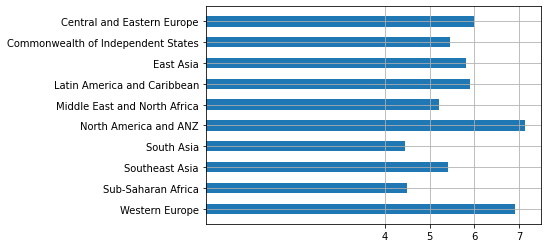

In [ ]:
#대륙 별 행복 지수 평균(표로 알아보았지만 그래프를 활용하여 한 눈에 알아보자)
aver = [hp_report21[hp_report21['Regional indicator']=='Western Europe']['Ladder score'].mean(),
    hp_report21[hp_report21['Regional indicator']=='Sub-Saharan Africa']['Ladder score'].mean(),
    hp_report21[hp_report21['Regional indicator']=='Southeast Asia']['Ladder score'].mean(),
    hp_report21[hp_report21['Regional indicator']=='South Asia']['Ladder score'].mean(),
    hp_report21[hp_report21['Regional indicator']=='North America and ANZ']['Ladder score'].mean(),
    hp_report21[hp_report21['Regional indicator']=='Middle East and North Africa']['Ladder score'].mean(),
    hp_report21[hp_report21['Regional indicator']=='Latin America and Caribbean']['Ladder score'].mean(),
    hp_report21[hp_report21['Regional indicator']=='East Asia']['Ladder score'].mean(),
    hp_report21[hp_report21['Regional indicator']=='Commonwealth of Independent States']['Ladder score'].mean(),
    hp_report21[hp_report21['Regional indicator']=='Central and Eastern Europe']['Ladder score'].mean()]
     
Continent = ['Western Europe', 'Sub-Saharan Africa', 'Southeast Asia', 'South Asia', 'North America and ANZ', 'Middle East and North Africa', 'Latin America and Caribbean',  'East Asia', 'Commonwealth of Independent States', 'Central and Eastern Europe']

plt.barh(range(10), aver, height=0.5)
plt.yticks(range(10), Continent)
plt.xticks([4,5,6,7])
plt.grid(True)
plt.show()

# **행복과 1인당 gdp의 관계**

1인당 gdp와 행복의 관계를 확인해보자

x축은 국가별 1인당 gdp, y축은 국가별 행복지수를 나타낸다.

이 산점도가 양의 선형 관계를 보여주고 있으므로 
1인당 gdp가 높을 수록 행복 지수가 높다는 것을 확인 할 수 있다.

**즉, 1인당 gdp가 높은 나라라면 그 나라의 국민들은 행복할 가능성이 높다.**

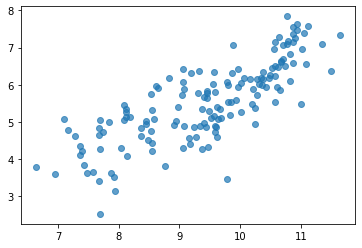

In [ ]:
#1인당 gdp와 행복의 관계
x = hp_report21['Logged GDP per capita']
y = hp_report21['Ladder score']

plt.scatter(x, y, alpha=0.7)
plt.show()

#**행복과 삶의 선택의 자유(자유로운 삶)의 관계**

만약 누군가가 시키거나 국가가 제한하는 범위에서만 생활을 해야한다면 행복할 수 있을까?

이 데이터의 결과를 확인해야 하나 싶지만 확인해보자!

데이터가 많이 산발적이기는 하지만 집중적으로 몰려있는 곳들을 확인한다면 양의 선형 관계를 확인 할 수 있다.

따라서 삶의 선택의 자유가 클 수록 행복하다고 할 수 있다.


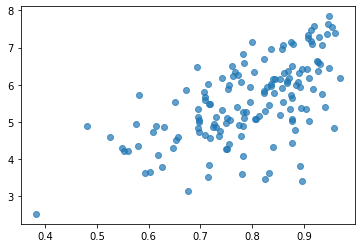

In [ ]:
#삶의 선택의 자유와 행복의 관계
x = hp_report21['Freedom to make life choices']
y = hp_report21['Ladder score']

plt.scatter(x, y, alpha=0.7)
plt.show()

# **행복과 건강 수명의 관계**

x축은 건강 수명(건강하게 생산적으로 살아갈 수 있을거라 기대되는 기간), y축은 행복지수 이다.

이 산점도가 양의 선형 관계를 보여주고 있으므로 건강 수명이 높을 수록 행복 지수가 높다는 것을 확인 할 수 있다.

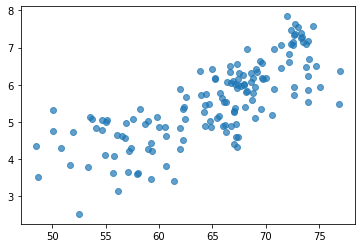

In [ ]:
#행복과 건강수명의 관계
x = hp_report21['Healthy life expectancy']
y = hp_report21['Ladder score']

plt.scatter(x, y, alpha=0.7)
plt.show()

# **행복과 부패 인식의 관계**

행복과 부패인식의 상관 관계를 확인해보자

x축은 부패인식도(클수록 부패하였다고 인식), y축은 행복도이다

이 산점도가 음의 선형 관계를 보여주고 있으므로 부패 인식이 낮을 수록 행복지수가 큰 것을 확인 할 수 있다.

즉, 국가가 부패하지 않았다고 생각할 수록 행복하다는 것을 확인할 수 있다.

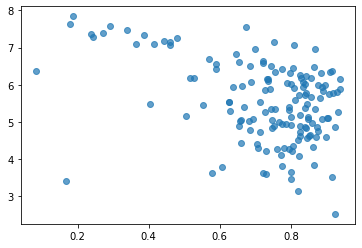

In [ ]:
#행복과 부패인식의 관계
x = hp_report21['Perceptions of corruption']
y = hp_report21['Ladder score']

plt.scatter(x, y, alpha=0.7)
plt.show()

## 4. 결론
- 질문에 대한 답

    행복지수가 가장 높은 국가는 핀란드(7.842)였고 가장 낮은 국가는 아프가니스탄(2.523)이다.

    우리나라의 행복지수는 5.845이며 이 수치는 전세계 백분률 50% (5.534)보다 살짝 높은 수치이며 75%(6.255)에는 미치지 못했으며 우리나라가 속해있는 동아시아(대한민국, 몽골, 중국, 일본, 대만, 홍콩) 평균(5.810)을 겨우 넘었다. 동아시아에서는 중국이 5.339로 가장 낮았으며, 일본이 5.94로 가장 높았다.

    행복에 영향을 미치는 요인으로 1인당 gdp, 삶의 자유, 건강 수명, 부패인식을 들수있을 것 같다. 1인당 gdp와 삶의 자유도, 건강 수명이 높을 수록, 부패 인식률이 낮을 수록 행복하다고 말 할 수 있을 것 같다.

    핀란드로 가자!